# (二)使用 Linear Regression 預測在不同的時間，租借共享單車的人數預測 (count)

### 1. 讀入訓練資料 HW2_bike-sharing_train.csv。

In [1]:
import pandas as pd

df= pd.read_csv("HW2_bike-sharing_train.csv")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-1-1 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-1-1 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-1-1 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-1-1 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-1-1 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
8381,2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,562
8382,2012-12-19 18:00:00,4,0,1,1,15.58,19.695,50,23.9994,569
8383,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
8384,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241


### 2. 對日期欄位進行處理。

In [2]:
tmp=pd.to_datetime(df["datetime"])
#dft["year"]=tmp.dt.year
df.insert(0, "year", tmp.dt.year)
df.insert(1, "month", tmp.dt.month)
df.insert(2, "day", tmp.dt.day)
df.insert(3, "hour", tmp.dt.hour)
df.drop(columns=["datetime"], inplace=True)
df

,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011,1,1,0,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011,1,1,1,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011,1,1,2,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011,1,1,3,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011,1,1,4,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,2012,12,19,17,4,0,1,1,16.40,20.455,50,26.0027,562
8382,2012,12,19,18,4,0,1,1,15.58,19.695,50,23.9994,569
8383,2012,12,19,19,4,0,1,1,15.58,19.695,50,26.0027,336
8384,2012,12,19,20,4,0,1,1,14.76,17.425,57,15.0013,241


In [3]:
##############################

,year,count
0,2011,604160
1,2012,997914


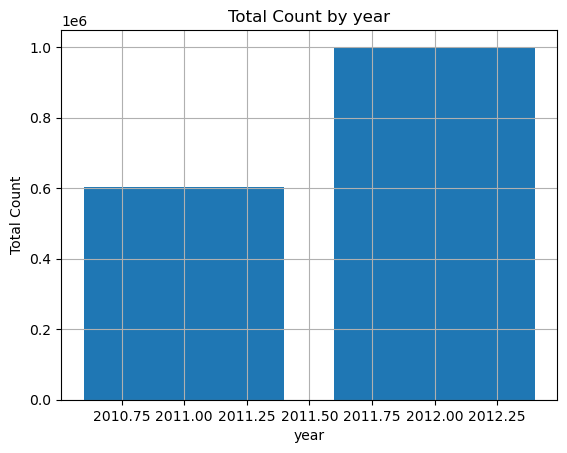

,month,count
0,1,58991
1,2,78746
2,3,106020
3,4,130370
4,5,153603
5,6,170949
6,7,164800
7,8,163079
8,9,163370
9,10,157649


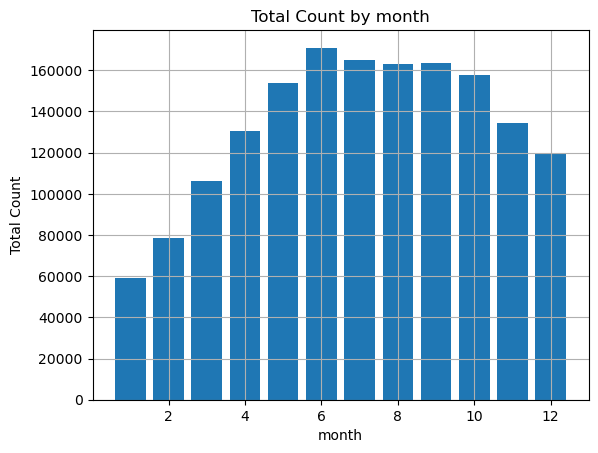

,day,count
0,1,78597
1,2,82178
2,3,84693
3,4,89333
4,5,85789
5,6,83021
6,7,82230
7,8,80908
8,9,81172
9,10,89587


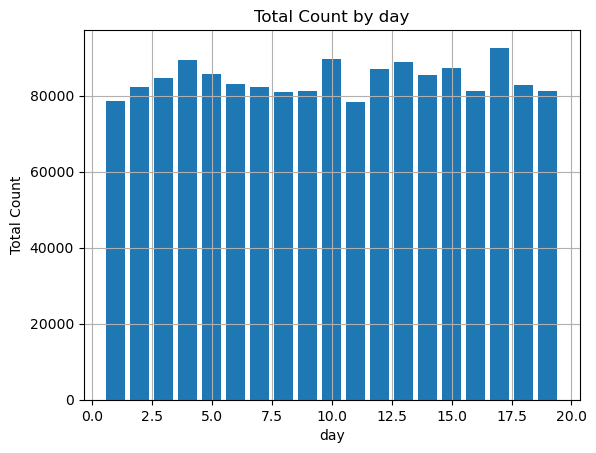

,hour,count
0,0,19966
1,1,12266
2,2,8069
3,3,4046
4,4,2224
5,5,7090
6,6,26714
7,7,72309
8,8,124580
9,9,78807


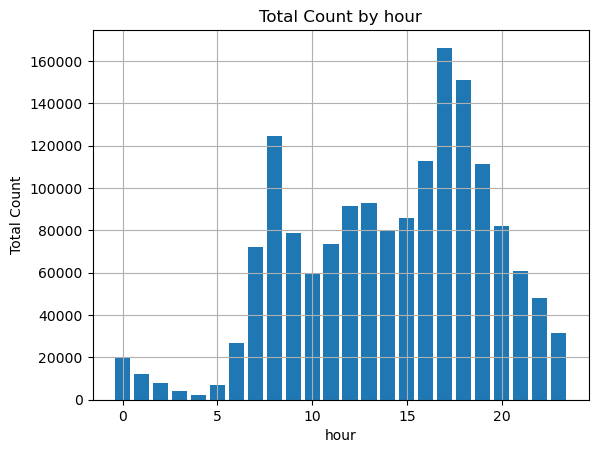

,season,count
0,1,243757
1,2,454922
2,3,491249
3,4,412146


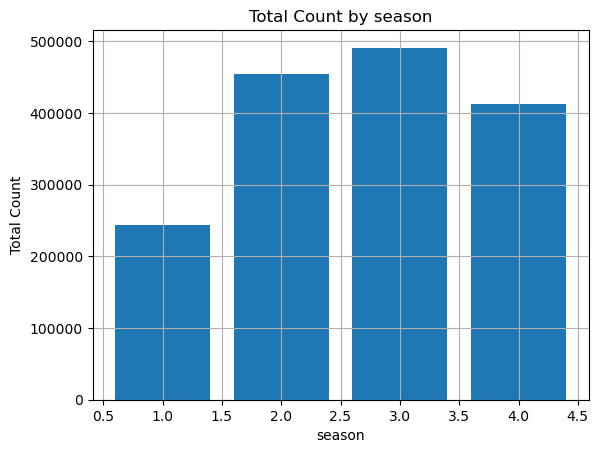

,holiday,count
0,0,1557613
1,1,44461


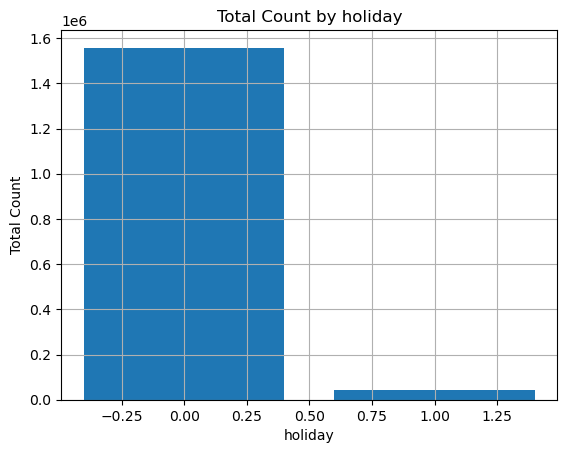

,workingday,count
0,0,495960
1,1,1106114


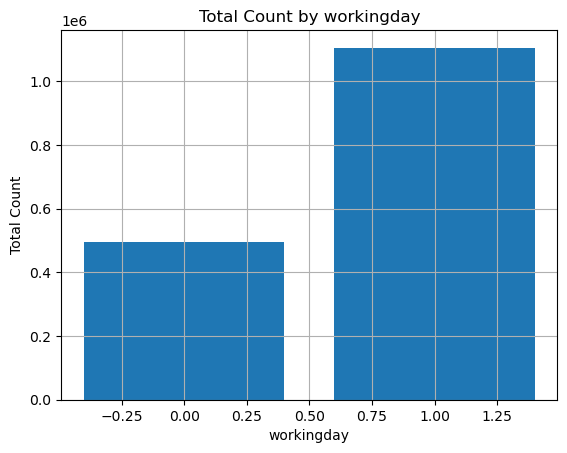

,weather,count
0,1,1132624
1,2,390761
2,3,78525
3,4,164


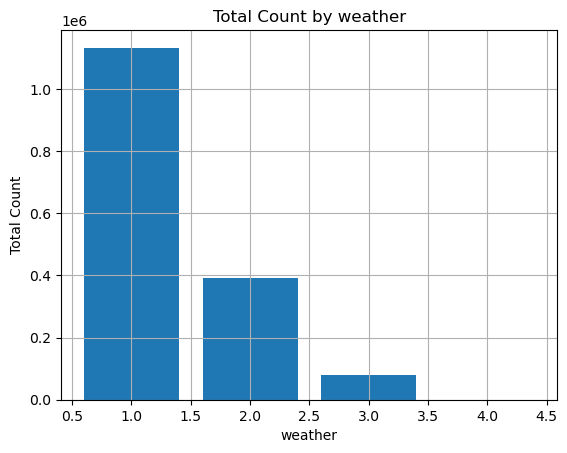

,temp,count
0,0.82,543
1,1.64,183
2,2.46,165
3,3.28,188
4,4.10,1774
5,4.92,2892
6,5.74,4003
7,6.56,8083
8,7.38,5729
9,8.20,15504


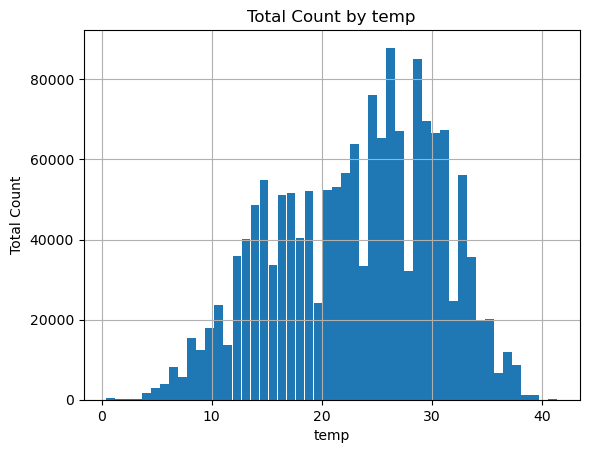

,atemp,count
0,0.760,1
1,1.515,3
2,2.275,242
3,3.030,564
4,3.790,508
5,4.545,367
6,5.305,1331
7,6.060,3695
8,6.820,2916
9,7.575,2838


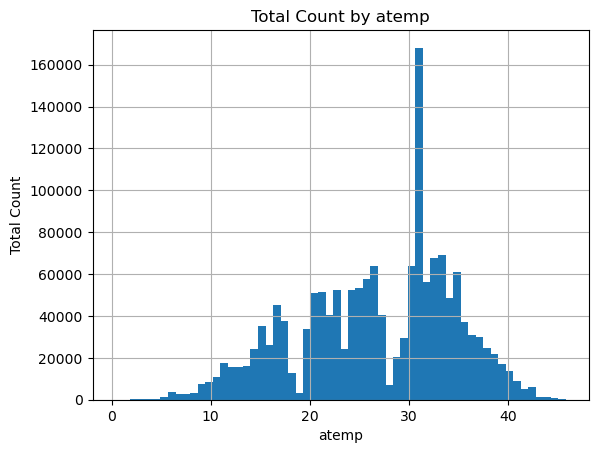

,humidity,count
0,0,515
1,10,107
2,12,29
3,13,17
4,14,31
...,...,...
82,92,152
83,93,10861
84,94,19612
85,97,64


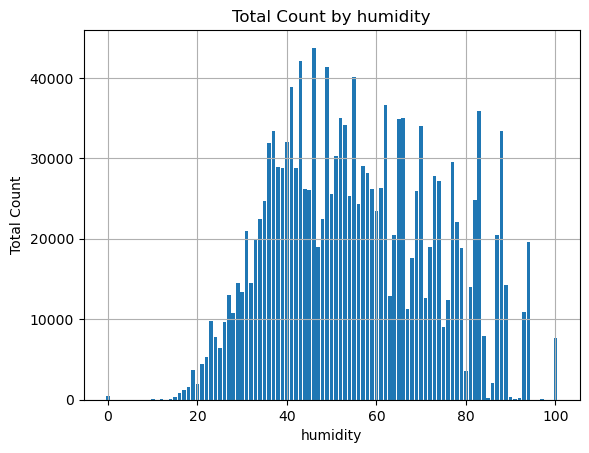

,windspeed,count
0,0.0000,162816
1,6.0032,100186
2,7.0015,131459
3,8.9981,150149
4,11.0014,166472
5,12.9980,165731
6,15.0013,155110
7,16.9979,132636
8,19.0012,110371
9,19.9995,85891


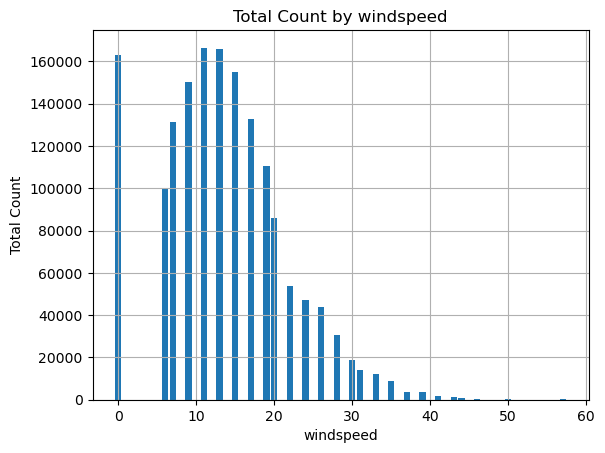

In [4]:
import matplotlib.pyplot as plt
columns = [col for col in df.columns if col != 'count']
for col in columns:
    l = ['count']
    l.append(col) 
    bike_count = df[l].groupby(by=col).sum().reset_index()
    bike_count.columns = [col,'count']
    display(bike_count )
    
    #plt.plot(bike_count[col], bike_count['count'], marker='o')
    plt.bar(bike_count[col], bike_count['count'])
    plt.xlabel(col)
    plt.ylabel('Total Count')
    plt.title('Total Count by '+col)
    plt.grid(True)
    plt.show()

In [5]:
numerical_features = []
categorical_features = []

# splitting features into numeric and categoric.
'''
If feature has more than 35 categories we will consider it
as numerical_features, remaining features will be added to categorical_features.
'''
columns = [col for col in df.columns if col != 'count']
for col in columns:  
  if df[col].nunique() > 35:
    numerical_features.append(col) 
  else:
    categorical_features.append(col) 

print(f'Numerical Features : {numerical_features}')
print(f'Categorical Features : {categorical_features}')

Numerical Features : ['temp', 'atemp', 'humidity']
Categorical Features : ['year', 'month', 'day', 'hour', 'season', 'holiday', 'workingday', 'weather', 'windspeed']


In [6]:
# we are going to replace the datapoints with upper and lower bound of all the outliers

def clip_outliers(df):
    for col in df[numerical_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # replacing the outliers with upper and lower bound
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df

In [7]:
# using the function to treat outliers
df = clip_outliers(df)

In [8]:
#################################

In [9]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#features_to_normalize = ['temp', 'atemp', 'humidity', 'windspeed']
features_to_normalize=[col for col in df.columns if col != 'count']
scaler = MinMaxScaler()
df[features_to_normalize]= scaler.fit_transform(df[features_to_normalize])
df

,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.224490,0.305068,0.806122,0.000000,16
1,0.0,0.0,0.0,0.043478,0.0,0.0,0.0,0.0,0.204082,0.288064,0.795918,0.000000,40
2,0.0,0.0,0.0,0.086957,0.0,0.0,0.0,0.0,0.204082,0.288064,0.795918,0.000000,32
3,0.0,0.0,0.0,0.130435,0.0,0.0,0.0,0.0,0.224490,0.305068,0.744898,0.000000,13
4,0.0,0.0,0.0,0.173913,0.0,0.0,0.0,0.0,0.224490,0.305068,0.744898,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,1.0,1.0,1.0,0.739130,1.0,0.0,1.0,0.0,0.387755,0.440653,0.489796,0.456213,562
8382,1.0,1.0,1.0,0.782609,1.0,0.0,1.0,0.0,0.367347,0.423649,0.489796,0.421065,569
8383,1.0,1.0,1.0,0.826087,1.0,0.0,1.0,0.0,0.367347,0.423649,0.489796,0.456213,336
8384,1.0,1.0,1.0,0.869565,1.0,0.0,1.0,0.0,0.346939,0.372860,0.561224,0.263195,241


### 3. 利用 regression 推測使用人數。產生準確率的指標。

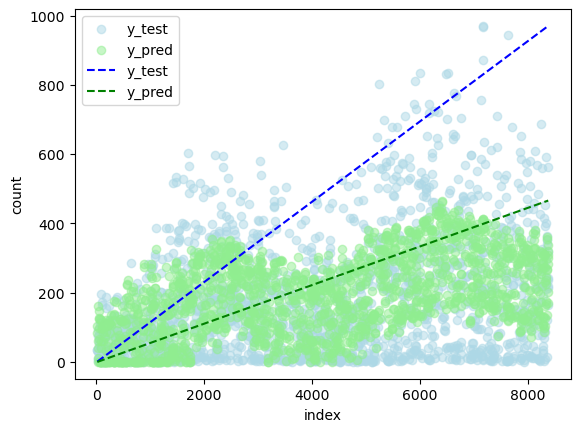

'\nprint("準確率的指標:")\nscore =model.score(x_test,y_test)\nprint(\'Score: \', score)\nprint(\'Accuracy: \' + str(score*100) + \'%\')\n'

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


x=df.drop(columns=['count'])
y=df['count']


x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred[y_pred < 0] = 1 #負數設為1
plt.scatter(x_test.index, y_test, c='lightblue',alpha=0.5,label='y_test')
plt.scatter(x_test.index, y_pred, c='lightgreen',alpha=0.5,label='y_pred')

plt.plot([min(x_test.index), max(x_test.index)], [min(y_test), max(y_test)], color='blue', linestyle='--',label='y_test')
plt.plot([min(x_test.index), max(x_test.index)], [min(y_pred), max(y_pred)], color='green', linestyle='--',label='y_pred')
plt.legend()
plt.xlabel('index')
plt.ylabel('count')
plt.show()

"""
print("準確率的指標:")
score =model.score(x_test,y_test)
print('Score: ', score)
print('Accuracy: ' + str(score*100) + '%')
"""

In [11]:
from sklearn.metrics import  r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared (判定係數):", r2)

R-squared (判定係數): 0.41188927047983714


#### 準確率的指標:
#### R-squared, R2: R平方(R squared)又稱為判定係數(coefficient of determination)，是一種衡量回歸模型表現的指標

### 4. 請利用訓練後的模型預測測試資料 HW2_ bike-sharing_test.csv 的離職情況，並將結果存成 HW2_bike-sharing _test_sol.csv，儲存格式如下範例。該結果的準確率將佔此一題分數的 35%

In [12]:
import pandas as pd

df2= pd.read_csv("HW2_bike-sharing_test.csv")
tmp2=pd.to_datetime(df2["datetime"])
#dft["year"]=tmp.dt.year
df2.insert(0, "year", tmp2.dt.year)
df2.insert(1, "month", tmp2.dt.month)
df2.insert(2, "day", tmp2.dt.day)
df2.insert(3, "hour", tmp2.dt.hour)
df2.drop(columns=["datetime"], inplace=True)
df2

,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2012,12,9,17,4,0,0,3,14.76,17.425,93,8.9981
1,2011,2,12,20,1,0,0,1,10.66,12.880,41,15.0013
2,2012,12,12,13,4,0,1,2,13.94,18.180,42,0.0000
3,2011,7,4,15,3,1,0,1,33.62,37.120,43,6.0032
4,2012,7,17,14,3,0,1,1,38.54,41.665,29,16.9979
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2011,4,12,18,2,0,1,3,18.04,21.970,77,15.0013
2496,2011,3,4,9,1,0,1,1,9.02,11.365,60,8.9981
2497,2011,10,1,7,4,0,0,3,17.22,21.210,67,16.9979
2498,2011,1,1,19,1,0,0,3,17.22,21.210,88,16.9979


In [13]:
df2 = clip_outliers(df2)

In [14]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
features_to_normalize=[col for col in df2.columns if col != 'count']
scaler = MinMaxScaler()
df2[features_to_normalize]= scaler.fit_transform(df2[features_to_normalize])
df2

,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,1.0,1.000000,0.444444,0.739130,1.000000,0.0,0.0,1.0,0.361702,0.379310,0.929648,0.187465
1,0.0,0.090909,0.611111,0.869565,0.000000,0.0,0.0,0.0,0.255319,0.275862,0.407035,0.312535
2,1.0,1.000000,0.611111,0.565217,1.000000,0.0,1.0,0.5,0.340426,0.396495,0.417085,0.000000
3,0.0,0.545455,0.166667,0.652174,0.666667,1.0,0.0,0.0,0.851064,0.827586,0.427136,0.125070
4,1.0,0.545455,0.888889,0.608696,0.666667,0.0,1.0,0.0,0.978723,0.931034,0.286432,0.354132
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.0,0.272727,0.611111,0.782609,0.333333,0.0,1.0,1.0,0.446809,0.482759,0.768844,0.312535
2496,0.0,0.181818,0.166667,0.391304,0.000000,0.0,1.0,0.0,0.212766,0.241379,0.597990,0.187465
2497,0.0,0.818182,0.000000,0.304348,1.000000,0.0,0.0,1.0,0.425532,0.465460,0.668342,0.354132
2498,0.0,0.000000,0.000000,0.826087,0.000000,0.0,0.0,1.0,0.425532,0.465460,0.879397,0.354132


In [15]:
new_pred=model.predict(df2)
new_pred[new_pred < 0] = 1
new_pred=new_pred.astype(int)
new_df = pd.DataFrame({'count': new_pred})
new_df.to_csv("HW2_bike-sharing_test_sol.csv", index=False)
new_df

,count
0,206
1,163
2,279
3,299
4,448
...,...
2495,135
2496,35
2497,103
2498,91


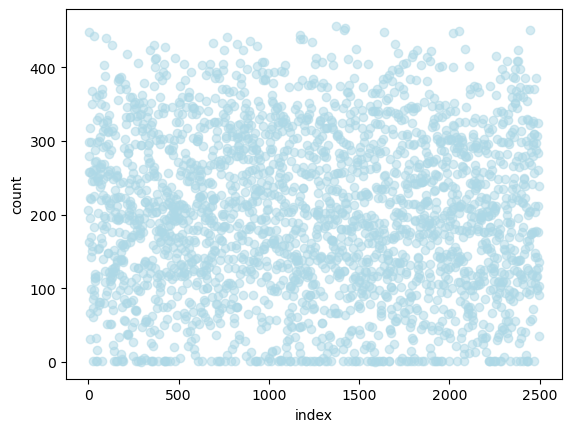

In [16]:
plt.scatter(df2.index, new_pred, c='lightblue',alpha=0.5,label='y_test')
plt.xlabel('index')
plt.ylabel('count')
plt.show()